<img style="float: left; width: 100px;" src='img/tera.jpg' alt="Tera">

-------

# Aula 12

## Análise Exploratória & Apresentação de *Insights*

Este é um tutorial introdutório a Análise Exploratória de dados visando apresentar os principais conceitos e métodos para simular um cenário realista do universo corporativo.

#### O que é?

*Exploratory Data Analysis* (EDA) é uma abordagem para análise de dados que emprega diversas técnicas para:
- Extração de *insights* de um conjunto de dados;
- Descoberta de estruturas adjacentes;
- Identificação de relevâncias de variáveis;
- Detecção de *outliers*;
- Confirmação de premissas;
- Consolidação de dados para modelagem.

**Não** se trata de um conjunto de técnicas, mas realmente de uma **abordagem** de como dados devem ser melhor explorados$^{1}$. A *grosso modo*, qualquer metodologia de exploração de dados que não inclui modelagem e inferência estatística formal é abordada através da Análise Exploratória de Dados$^{2}$.

Ao examinar detalhadamente seus dados, você se torna capaz de gerar melhores hipóteses.

#### Tipos de Dados

Existem vários tipos de dados em qualquer *dataset*:
- Numéricos;
- Categóricos;
- Binários;
- Textos

#### Tipos de EDA

A primeira forma de classificação é de métodos **gráficos** e **não-gráficos**, e a segunda classificação é onde cada método ou é **univariado** ou **multi-variado** (geralmente apenas **bi-variado**). Então temos 4 tipos$^{2}$:
- Univariado não-gráfico (*e.g.,* contagens, frequências, proporções, médias, amplitudes);
- Multi-variado não-gráfico (*e.g.,* tabulação cruzada, correlações, covariâncias);
- Univariado gráfico (*e.g.,* histogramas, boxplots, plots de distribuição de frequência);
- Multi-variado gráfico (*e.g.,* gráficos de dispersão, plots univariados de cada atributo).


#### Cursos
- [Análise de Dados com R](https://br.udacity.com/course/data-analysis-with-r--ud651), Udacity (by Facebook)
- [Análise Exploratória de Dados](https://www.coursera.org/learn/exploratory-data-analysis), Coursera (by Johns Hopkins University)
- [Análise Exploratória de Dados](https://www.datacamp.com/courses/exploratory-data-analysis), Datacamp

<br>

------------------
<font size=1px;>
$^{1}$ [What is EDA?](https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm), NIST/SEMATECH <br>
$^{2}$ [Chapter 4, Exploratory Data Analysis](http://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf), Carnegie Mellon University
</font>

<div id="banner">
    <div class="inline-block">
        <img style="float: left; width: 150px;" src='img/kaggle.png' alt="Kaggle">
    </div>
    <div class="inline-block">
        <img style="float: right; width: 150px;" src='img/avazu.jpg' alt="Avazu">
    </div>
</div>

### Caso de Uso

Vamos utilizar [uma competição do Kaggle](https://www.kaggle.com/c/avazu-ctr-prediction) com um caso real de uma empresa de Marketing Digital com foco em [*display advertising*](https://en.wikipedia.org/wiki/Display_advertising) chamada [**Avazu**](http://avazuinc.com/home/).

Sabe aqueles anúncios chatos que você bloqueia com AdBlock?
Ainda assim existem diversos anúncios que "burlam" esta restrição, mas você imediatamente o minimiza/fecha quando vê esta opção ("X").
Você já parou para pensar que até mesmos estes milissegundos de exibição devem ser pensados estrategicamente?
Você exibiria um anúncio qualquer ou apenas aquele com maiores chances de chamar a atenção do seu público-alvo?

Existem diversas [métricas de Marketing Digital](https://www.amazon.com/Marketing-Metrics-Definitive-Measuring-Performance-ebook/dp/B0031AI0VC) para mensurar a performance de campanhas e anúncios (CPC, CPM, CTR, CPA, *bounce rate*, etc) e nesta análise iremos focar no *click-through rate* (CTR): percentual da quantidade de cliques por impressão (=visualização) de um anúncio **(CTR = cliques / impressões * 100)**.

### Dataset

Foram disponibilizados dois *datasets* (treino e teste) com **11 dias** de dados coletados pelos modelos da Avazu. Euzinha apenas adicionei **ruidos, lixos, dados inválidos** e outras *cositas más*, tudo pelo aprendizado de vocês <3

<img style="float: left; width: 100px;" src='img/jesus.jpg' alt="Jesus">

Também reduzi a quantidade de registros pela metade para que não tenhamos problemas de performance no pandas e lhes fiz o favor de dividir os dados de treino em **mais datasets** no intuito de também praticarmos a união de diferentes bases.

- **data-numeric.csv**: variáveis numéricas de dados de cliques ordenados cronologicamente, não-cliques e cliques foram divididos de diferentes formas;
- **data-categorias.csv**: variáveis categóricas de dados de cliques ordenados cronologicamente, não-cliques e cliques foram divididos de diferentes formas.

### Atributos

- **id**: identificação do anúncio;
- **click**: campo binário para cliques;
- **hour**: formato YYMMDDHH, ou seja, 14091123 seria 23:00 (UTC) de 11 de setembro de 2014;
- **C1**: variável categórica anonimizada; 
- **banner_pos**;
- **site_id**;
- **site_domain**;
- **site_category**;
- **app_id**;
- **app_domain**;
- **app_category**;
- **device_id**;
- **device_ip**;
- **device_model**;
- **device_type**;
- **device_conn_type**;
- **C14-C22**: variáveis categóricas anonimizadas.

-----
## Configuração inicial

**Pandas**: biblioteca para manipulação de dados 

In [1]:
import pandas as pd

In [2]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 100

**Numpy**: biblioteca científica para manipulação de valores numéricos.

In [3]:
import numpy as np

**Matplotlib, seaborn:** bibliotecas para visualização de dados.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set(style="white")

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)

**boto3**: biblioteca para interação com o serviços em nuvem da AWS.

In [ ]:
!pip install boto3 --user

**Funções pré-definidas**: como vamos utilizar algumas funções mais de uma vez, deixei o código em um script Python para que fosse reaproveitado ao invés de duplicar código.

In [5]:
import utils

-----
## Leitura de Dados

Vamos ler os dados diretamente do S3, serviço de armazenamento em nuvem da AWS muito utilizado no mercado.
Não é necessário fazer o download dos arquivos para sua máquina ou instância na nuvem.

Vamos listar os arquivos disponíveis.

In [ ]:
for arquivo in arquivos['Contents']:
        print arquivo?

O primeiro *dataset* que vamos ler é o arquivos com atributos **numéricos**.

In [8]:
dados_numericos = pd.read_csv('s3:' + utils.S3_BUCKET + utils.S3_DIRETORIO + 'data-numeric.csv', 
                              low_memory=False, sep=',', encoding='utf-8')

Você reparou que utilizamos o parâmetro **chunksize**?

O arquivo que estamos lendo possui **2.6GB** (o original tem >6GB!) e você teria problemas de performance, isso caso seu processo ipython não travasse ou você recebesse um "MemoryError". 

Mas justamente por causa deste parâmetro você não vai conseguir rodar um **iloc**. Tente.

In [9]:
dados_numericos.iloc[:5]

AttributeError: 'TextFileReader' object has no attribute 'iloc'

Ao invés disso, você precisa utilizar outro método para exibir os registros.

Mas como então fazemos para ter e manipular um *dataframe* comum?

Precisamos **unir** os *chunks*! Não esqueça de adicionar o parâmetro "ignore_index" para não gerar desnecessariamente um *dataframe* com mais de um índice e dificultar a sua manipulação.

Agora temos um *dataframe* comum com 20.214.283 registros, ao invés dos 40.428.967 originais.

In [12]:
len(dados_numericos)

20214283

In [13]:
dados_numericos.iloc[:10]

,Unnamed: 0,"""id""","""click""","""hour""","""banner_pos""","""%site_id ""","""site_domain""","""site_category""","""app_&id""",""" app_DOmain""","""app_category""","""device_id""","""device_ip""","""device_model""","""device_type""","""device_conn_type""","""Unnamed: 0""","""Unnamed: Exce\u938cao Execução""","""Unnamed: """
0,200,1.002948e+18,0.0,14102100.0,NaN,85f751fd,"""nan",50e219e0,NaN,2347f47a,f95efa07,"""a99f214a""",ab9a5222,"2ee63ff8""",1.0,0.0,NaN,NaN,NaN
1,201,1.003005e+19,1.0,14102100.0,1.0,d9750ee7,"""98572c79",NaN,ecad2386,7801e8d9,07d7df22,"""a99f214a""",82628a01,"3d64834e""",1.0,NaN,NaN,NaN,NaN
2,202,1.003011e+19,0.0,14102100.0,0.0,ef5ed6b8,"""fa41b2d8",NaN,ecad2386,7801e8d9,07d7df22,"""bd544220""",661b3005,"43e7b962""",0.0,0.0,NaN,0.0,NaN
3,203,1.003023e+19,0.0,14102100.0,0.0,1fbe01fe,"""f3845767",NaN,ecad2386,7801e8d9,07d7df22,"""a99f214a""",5a9054ae,"8a4875bd""",1.0,0.0,NaN,NaN,NaN
4,204,1.003048e+19,0.0,14102100.0,0.0,1fbe01fe,"""f3845767",28905ebd,ecad2386,7801e8d9,07d7df22,"""nan""",59ac940d,"779d90c2""",1.0,NaN,NaN,NaN,NaN
5,205,1.003088e+19,0.0,14102100.0,0.0,543a539e,"""nan",NaN,ecad2386,7801e8d9,07d7df22,"""a99f214a""",f1a327e7,"nan""",1.0,0.0,NaN,NaN,0.0
6,206,1.003089e+19,NaN,14102100.0,0.0,543a539e,"""nan",3e814130,NaN,7801e8d9,07d7df22,"""a99f214a""",56d535f4,"d787e91b""",1.0,0.0,NaN,NaN,NaN
7,207,1.003111e+19,0.0,14102100.0,0.0,85f751fd,"""nan",NaN,39947756,2347f47a,cef3e649,"""ac49f12d""",afbca787,"b4920c7e""",1.0,2.0,NaN,0.0,NaN
8,208,1.003111e+19,NaN,14102100.0,0.0,543a539e,"""c7ca3108",NaN,ecad2386,7801e8d9,07d7df22,"""a99f214a""",bcca3c05,"6ce25010""",1.0,0.0,NaN,0.0,0.0
9,209,1.003114e+19,NaN,14102100.0,0.0,d8bb8687,"""nan",3e814130,ecad2386,NaN,07d7df22,"""a99f214a""",NaN,"d4897fef""",1.0,0.0,NaN,NaN,NaN


Vamos também ler o *dataset* com os atributos categóricos.

Novamente utilizamos o **chunksize** e precisamos unir os *chunks* de registros.

In [16]:
dados_categoricos.iloc[:10]

,Unnamed: 0,"""C1""","""C14""","""C15""","""C16""","""C17""","""C18""","""C19""","""C20""","""C21""","""C22""","""Unnamed: 1""","""Unnamed: 3"""
0,0,1005.0,15706.0,320.0,50.0,1722.0,0.0,35.0,-1.0,79.0,1722.0,NaN,NaN
1,1,1005.0,15704.0,320.0,NaN,1722.0,0.0,35.0,100084.0,79.0,NaN,NaN,0.0
2,2,1005.0,15704.0,320.0,50.0,NaN,0.0,35.0,100084.0,79.0,1722.0,NaN,0.0
3,3,1005.0,15706.0,320.0,50.0,1722.0,NaN,35.0,100084.0,79.0,NaN,NaN,NaN
4,4,1005.0,NaN,320.0,50.0,NaN,NaN,35.0,-1.0,157.0,2161.0,NaN,NaN
5,5,1005.0,16920.0,320.0,50.0,NaN,0.0,431.0,100077.0,117.0,NaN,NaN,NaN
6,6,NaN,20362.0,320.0,50.0,NaN,0.0,39.0,-1.0,157.0,2333.0,NaN,NaN
7,7,1005.0,20632.0,320.0,NaN,2374.0,3.0,39.0,-1.0,23.0,2374.0,NaN,NaN
8,8,1005.0,15707.0,320.0,50.0,NaN,NaN,NaN,-1.0,79.0,1722.0,NaN,NaN
9,9,NaN,21689.0,320.0,50.0,NaN,3.0,167.0,100191.0,23.0,2496.0,NaN,NaN


-----
## Exploração de Dados
# Q&A

Você já deve ter reparado que os dados estão literalmente **cagados** (sim, eu fiz um bom trabalho!).

Caso esteja curioso, mantive os arquivos originais no mesmo *bucket* do S3 para você fuçar como lição de casa. Cuidado apenas com questões de performance, lembre-se que os *datasets* originais possuem mais de 6GB.

Mas como talvez ainda não esteja convencido, vamos analisar a qualidade dos dados.

#### Atributos numéricos

#### Atributos categóricos

Comprovadamente os dois *dataframes* que você precisa utilizar possui tanto valores **nulos** quanto **NaN's**.

Estes são métodos formais e bem comuns para Q&A de dados, mas também podemos analisar graficamente a qualidade dos dados com algum esforço de codificação e utilizando as bibliotecas de visualização já conhecidas.

O método abaixo *(veja o arquivo **utils** para detalhes de implementação)* soma a quantidade de NaN's e null's, calcula o respectivo percentual e plota os valores de cada atributo em um gráfico.

#### Atributos numéricos

#### Atributos categóricos

Graficamente fica muito mais fácil de visualizar onde estão os problemas a serem resolvidos, não?

Além de te possibiliar apresentar um relatório de Q&A dos dados para seu cliente ou área de negócio ou usuário final, utilize essa estratégia sempre que puder.

Agora que você sabe quais atributos são problemáticos, **o que fazer** *(além de chorar #sqn)*?

1. Primeiro de tudo: **analise a representativa da invalidez dos atributos**. Não gaste tempo consertando aquilo que não será relevante, você só precisa fixar o que será utilizado;
2. Pontue **exatamente o que** está errado nos seus dados;
3. Veja como **corrigir** cada problema e em quais atributos você aplicará a solução, evite **repetir** esforços.

In [23]:
dados_numericos.iloc[:5]

,Unnamed: 0,"""id""","""click""","""hour""","""banner_pos""","""%site_id ""","""site_domain""","""site_category""","""app_&id""",""" app_DOmain""","""app_category""","""device_id""","""device_ip""","""device_model""","""device_type""","""device_conn_type""","""Unnamed: 0""","""Unnamed: Exce\u938cao Execução""","""Unnamed: """
0,200,1.002948e+18,0.0,14102100.0,NaN,85f751fd,"""nan",50e219e0,NaN,2347f47a,f95efa07,"""a99f214a""",ab9a5222,"2ee63ff8""",1.0,0.0,NaN,NaN,NaN
1,201,1.003005e+19,1.0,14102100.0,1.0,d9750ee7,"""98572c79",NaN,ecad2386,7801e8d9,07d7df22,"""a99f214a""",82628a01,"3d64834e""",1.0,NaN,NaN,NaN,NaN
2,202,1.003011e+19,0.0,14102100.0,0.0,ef5ed6b8,"""fa41b2d8",NaN,ecad2386,7801e8d9,07d7df22,"""bd544220""",661b3005,"43e7b962""",0.0,0.0,NaN,0.0,NaN
3,203,1.003023e+19,0.0,14102100.0,0.0,1fbe01fe,"""f3845767",NaN,ecad2386,7801e8d9,07d7df22,"""a99f214a""",5a9054ae,"8a4875bd""",1.0,0.0,NaN,NaN,NaN
4,204,1.003048e+19,0.0,14102100.0,0.0,1fbe01fe,"""f3845767",28905ebd,ecad2386,7801e8d9,07d7df22,"""nan""",59ac940d,"779d90c2""",1.0,NaN,NaN,NaN,NaN


In [24]:
dados_categoricos.iloc[:5]

,Unnamed: 0,"""C1""","""C14""","""C15""","""C16""","""C17""","""C18""","""C19""","""C20""","""C21""","""C22""","""Unnamed: 1""","""Unnamed: 3"""
0,0,1005.0,15706.0,320.0,50.0,1722.0,0.0,35.0,-1.0,79.0,1722.0,NaN,NaN
1,1,1005.0,15704.0,320.0,NaN,1722.0,0.0,35.0,100084.0,79.0,NaN,NaN,0.0
2,2,1005.0,15704.0,320.0,50.0,NaN,0.0,35.0,100084.0,79.0,1722.0,NaN,0.0
3,3,1005.0,15706.0,320.0,50.0,1722.0,NaN,35.0,100084.0,79.0,NaN,NaN,NaN
4,4,1005.0,NaN,320.0,50.0,NaN,NaN,35.0,-1.0,157.0,2161.0,NaN,NaN


## > Quais problemas você detectou?

<br>
<br>
<br>

#### Atributos numéricos

In [25]:
for coluna in dados_numericos.columns:
    
        
        novo_nome = ( 
        # acentuação, maiúsculas e minúsculas
        # TO-DO :)
        # aspas 
                          .replace('"', '')
        # caracteres especiais
                          .replace('%', '').replace('&', '')
        # espaços
                          .replace(' ', '')
                    )
        
        dados_numericos.rename(columns={coluna : novo_nome}, inplace=True)

Vamos confirmar se funcionou. Você pode usar o **iloc** da seguinte forma ao invés de rodar:
```
dados_numericos.columns
```

In [26]:
dados_numericos.iloc[:0]

,unnamed:0,id,click,hour,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,unnamed:0,unnamed:exce\u938caoexecuo,unnamed:


#### Atributos categóricos

In [28]:
dados_categoricos.iloc[:0]

,unnamed:0,c1,c14,c15,c16,c17,c18,c19,c20,c21,c22,unnamed:1,unnamed:3


## Vamos unir os *dataframes*

Existem [diferentes métodos](https://pandas.pydata.org/pandas-docs/stable/merging.html) para isto no pandas *(concatenate, merge, join)* que funcionam da mesma forma como no SQL tradicional *(e.g., inner/outer/right/left join)*. O único detalhe é que você precisa **especificar quais os campos em comum** entre eles, do contrário, resultará em um *dataframe* com estes campos duplicados.

Em nosso caso, o *dataset* original não tinha essa divisão e o dividi em dois mantendo a ordem para facilitar a união posterior. Então podemos utilizar duas abordagens:
1. Uní-los pelo atributo **unnamed:0** gerado incorretamente duplicando o índice;
2. Remover o atributo **unnamed:0** e agregar colunas do *dataframe* **"dados_categoricos"** no final do *dataframe* **"dados_numericos"**.

### Abordagem 2! ✓

Removendo colunas com índice duplicado.

In [29]:
dados_categoricos.drop('unnamed:0', axis=1, inplace=True)

In [30]:
dados_numericos.drop('unnamed:0', axis=1, inplace=True)

**Concatenando** *dataframes*.

In [32]:
dados.iloc[:5]

,id,click,hour,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,unnamed:exce\u938caoexecuo,unnamed:,c1,c14,c15,c16,c17,c18,c19,c20,c21,c22,unnamed:1,unnamed:3
0,1.002948e+18,0.0,14102100.0,NaN,85f751fd,"""nan",50e219e0,NaN,2347f47a,f95efa07,"""a99f214a""",ab9a5222,"2ee63ff8""",1.0,0.0,NaN,NaN,1005.0,15706.0,320.0,50.0,1722.0,0.0,35.0,-1.0,79.0,1722.0,NaN,NaN
1,1.003005e+19,1.0,14102100.0,1.0,d9750ee7,"""98572c79",NaN,ecad2386,7801e8d9,07d7df22,"""a99f214a""",82628a01,"3d64834e""",1.0,NaN,NaN,NaN,1005.0,15704.0,320.0,NaN,1722.0,0.0,35.0,100084.0,79.0,NaN,NaN,0.0
2,1.003011e+19,0.0,14102100.0,0.0,ef5ed6b8,"""fa41b2d8",NaN,ecad2386,7801e8d9,07d7df22,"""bd544220""",661b3005,"43e7b962""",0.0,0.0,0.0,NaN,1005.0,15704.0,320.0,50.0,NaN,0.0,35.0,100084.0,79.0,1722.0,NaN,0.0
3,1.003023e+19,0.0,14102100.0,0.0,1fbe01fe,"""f3845767",NaN,ecad2386,7801e8d9,07d7df22,"""a99f214a""",5a9054ae,"8a4875bd""",1.0,0.0,NaN,NaN,1005.0,15706.0,320.0,50.0,1722.0,NaN,35.0,100084.0,79.0,NaN,NaN,NaN
4,1.003048e+19,0.0,14102100.0,0.0,1fbe01fe,"""f3845767",28905ebd,ecad2386,7801e8d9,07d7df22,"""nan""",59ac940d,"779d90c2""",1.0,NaN,NaN,NaN,1005.0,NaN,320.0,50.0,NaN,NaN,35.0,-1.0,157.0,2161.0,NaN,NaN


## Bônus!

Criei um novo *dataframe* por um motivo: demonstrar como deletar objetos e "limpar a memória" no python.

Para quem já programa, principalmente em Java, o conceito é bem fácil de assimilar já que aqui a nomenclatura também é **Garbage Collector** (gc).

In [33]:
import gc

In [34]:
del dados_numericos, dados_categoricos

### Principalmente quando estiver lidando com *datasets* grandes e gerando *dataframes* auxiliares/temporários, é muito importante garantir a desalocação de memória.

Também é deve-se lembrar de um detalhe **muito** importante: 

### objetos vs. referências

Vamos **literalmente** copiar um *dataframe* para um novo *dataframe*.

In [36]:
tmp = dados.copy()

Mas o que acontece se você não **copiar** o *dataframe*? Vamos ver.

In [37]:
aux = tmp

In [38]:
aux.iloc[:5]

,id,click,hour,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,unnamed:exce\u938caoexecuo,unnamed:,c1,c14,c15,c16,c17,c18,c19,c20,c21,c22,unnamed:1,unnamed:3
0,1.002948e+18,0.0,14102100.0,NaN,85f751fd,"""nan",50e219e0,NaN,2347f47a,f95efa07,"""a99f214a""",ab9a5222,"2ee63ff8""",1.0,0.0,NaN,NaN,1005.0,15706.0,320.0,50.0,1722.0,0.0,35.0,-1.0,79.0,1722.0,NaN,NaN
1,1.003005e+19,1.0,14102100.0,1.0,d9750ee7,"""98572c79",NaN,ecad2386,7801e8d9,07d7df22,"""a99f214a""",82628a01,"3d64834e""",1.0,NaN,NaN,NaN,1005.0,15704.0,320.0,NaN,1722.0,0.0,35.0,100084.0,79.0,NaN,NaN,0.0
2,1.003011e+19,0.0,14102100.0,0.0,ef5ed6b8,"""fa41b2d8",NaN,ecad2386,7801e8d9,07d7df22,"""bd544220""",661b3005,"43e7b962""",0.0,0.0,0.0,NaN,1005.0,15704.0,320.0,50.0,NaN,0.0,35.0,100084.0,79.0,1722.0,NaN,0.0
3,1.003023e+19,0.0,14102100.0,0.0,1fbe01fe,"""f3845767",NaN,ecad2386,7801e8d9,07d7df22,"""a99f214a""",5a9054ae,"8a4875bd""",1.0,0.0,NaN,NaN,1005.0,15706.0,320.0,50.0,1722.0,NaN,35.0,100084.0,79.0,NaN,NaN,NaN
4,1.003048e+19,0.0,14102100.0,0.0,1fbe01fe,"""f3845767",28905ebd,ecad2386,7801e8d9,07d7df22,"""nan""",59ac940d,"779d90c2""",1.0,NaN,NaN,NaN,1005.0,NaN,320.0,50.0,NaN,NaN,35.0,-1.0,157.0,2161.0,NaN,NaN


Vamos renomear uma coluna no **novo** dataframe criado a partir do **tmp**.

In [40]:
aux.iloc[:0]

,teste,click,hour,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,unnamed:exce\u938caoexecuo,unnamed:,c1,c14,c15,c16,c17,c18,c19,c20,c21,c22,unnamed:1,unnamed:3


Alteramos o **aux**, portanto o **tmp** deve estar intacto... correto?
<br>
<br>
<br>

# #SQN

In [41]:
tmp.iloc[:0]

,teste,click,hour,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,unnamed:exce\u938caoexecuo,unnamed:,c1,c14,c15,c16,c17,c18,c19,c20,c21,c22,unnamed:1,unnamed:3


Já o nosso *dataframe* original que **copiamos**, está!

In [42]:
dados.iloc[:0]

,id,click,hour,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,unnamed:exce\u938caoexecuo,unnamed:,c1,c14,c15,c16,c17,c18,c19,c20,c21,c22,unnamed:1,unnamed:3


Nunca se esqueça deste conceito: quando você retorna um *dataframe* você está **apontando** a referência deste *dataframe* para um novo objeto, mas **não está criando** um novo *dataframe*!

### referências != objetos

14

Vamos analisar como está nosso *dataframe*.

In [44]:
dados.iloc[:5]

,id,click,hour,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,unnamed:exce\u938caoexecuo,unnamed:,c1,c14,c15,c16,c17,c18,c19,c20,c21,c22,unnamed:1,unnamed:3
0,1.002948e+18,0.0,14102100.0,NaN,85f751fd,"""nan",50e219e0,NaN,2347f47a,f95efa07,"""a99f214a""",ab9a5222,"2ee63ff8""",1.0,0.0,NaN,NaN,1005.0,15706.0,320.0,50.0,1722.0,0.0,35.0,-1.0,79.0,1722.0,NaN,NaN
1,1.003005e+19,1.0,14102100.0,1.0,d9750ee7,"""98572c79",NaN,ecad2386,7801e8d9,07d7df22,"""a99f214a""",82628a01,"3d64834e""",1.0,NaN,NaN,NaN,1005.0,15704.0,320.0,NaN,1722.0,0.0,35.0,100084.0,79.0,NaN,NaN,0.0
2,1.003011e+19,0.0,14102100.0,0.0,ef5ed6b8,"""fa41b2d8",NaN,ecad2386,7801e8d9,07d7df22,"""bd544220""",661b3005,"43e7b962""",0.0,0.0,0.0,NaN,1005.0,15704.0,320.0,50.0,NaN,0.0,35.0,100084.0,79.0,1722.0,NaN,0.0
3,1.003023e+19,0.0,14102100.0,0.0,1fbe01fe,"""f3845767",NaN,ecad2386,7801e8d9,07d7df22,"""a99f214a""",5a9054ae,"8a4875bd""",1.0,0.0,NaN,NaN,1005.0,15706.0,320.0,50.0,1722.0,NaN,35.0,100084.0,79.0,NaN,NaN,NaN
4,1.003048e+19,0.0,14102100.0,0.0,1fbe01fe,"""f3845767",28905ebd,ecad2386,7801e8d9,07d7df22,"""nan""",59ac940d,"779d90c2""",1.0,NaN,NaN,NaN,1005.0,NaN,320.0,50.0,NaN,NaN,35.0,-1.0,157.0,2161.0,NaN,NaN


Ainda estamos com os seguintes problemas identificados anteriormente:
- Atributos com **nomes de coluna desconhecidos** (*e.g.,* "Unnamed: 3");
- Colunas com valores **entre aspas**;
- Valores númericos em **notação científica**.

Vamos começar analisando se os atributos desconhecidos a seguir possuem algum valor, assim confirmamos se tratam-se de ruídos de manipulação de arquivos ou se realmente são atributos com muitos registros inválidos:
- "unnamed:"
- "unnamed:1"
- "unnamed:3"
- "unnamed:exce\u938caoexecuo"

In [45]:
count_att1 = len(dados['unnamed:']) - dados['unnamed:'].count()
count_att2 = len(dados['unnamed:1']) - dados['unnamed:1'].count()
count_att3 = len(dados['unnamed:3']) - dados['unnamed:3'].count()
count_att4 = len(dados['unnamed:exce\u938caoexecuo']) - dados['unnamed:exce\u938caoexecuo'].count()

In [46]:
print count_att1, ' de ', len(dados), '(', (count_att1*100)/len(dados), '%)'
print count_att2, ' de ', len(dados), '(', (count_att2*100)/len(dados), '%)'
print count_att3, ' de ', len(dados), '(', (count_att3*100)/len(dados), '%)'
print count_att4, ' de ', len(dados), '(', (count_att4*100)/len(dados), '%)'

12211300  de  20214483 ( 60 %)
20214483  de  20214483 ( 100 %)
17668097  de  20214483 ( 87 %)
13666312  de  20214483 ( 67 %)


O resultado diz que o atributo **"unnamed:1"** não possui nenhuma linha válida.

Já os demais possuem registros com algum tipo de valor, mas será que ainda assim são válidos?

In [47]:
count_att1_b = len(dados.loc[dados['unnamed:']==0])
count_att3_b = len(dados.loc[dados['unnamed:3']==0])
count_att4_b = len(dados.loc[dados['unnamed:exce\u938caoexecuo']==0])

In [48]:
print count_att1_b, ' de ', count_att1, '(', (count_att1_b*100)/len(dados), '%)'
print count_att3_b, ' de ', count_att3, '(', (count_att3_b*100)/len(dados), '%)'
print count_att4_b, ' de ', count_att4, '(', (count_att4_b*100)/len(dados), '%)'

8003183  de  12211300 ( 39 %)
2546386  de  17668097 ( 12 %)
6548171  de  13666312 ( 32 %)


Vamos somar as quantidades de valores inválidos com as quantidades de registros com 0.0.

In [49]:
print count_att1+count_att1_b, ' de ', len(dados), '(', ((count_att1+count_att1_b)*100)/len(dados), '%)'
print count_att3+count_att3_b, ' de ', len(dados), '(', ((count_att3+count_att3_b)*100)/len(dados), '%)'
print count_att4+count_att4_b, ' de ', len(dados), '(', ((count_att4+count_att4_b)*100)/len(dados), '%)'

20214483  de  20214483 ( 100 %)
20214483  de  20214483 ( 100 %)
20214483  de  20214483 ( 100 %)


### Ou seja, a maioria dos registros são inválidos e os poucos que possuem algum valor é igual a 0.0.

Vamos desconsiderar os quatro atributos.

In [50]:
dados = dados.drop('unnamed:', axis=1) \
             .drop('unnamed:1', axis=1) \
             .drop('unnamed:3', axis=1) \
             .drop('unnamed:exce\u938caoexecuo', axis=1)

Vamos executar o Q&A gráfico novamente.

O atributo **"site_category"** possui mais de 70% de registros inválidos.

## > Devemos considerá-lo?  

<br>
<br>
<br>

Vamos rever os dados.

In [53]:
dados.iloc[:10]

,id,click,hour,banner_pos,site_id,site_domain,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,c1,c14,c15,c16,c17,c18,c19,c20,c21,c22
0,1.002948e+18,0.0,14102100.0,NaN,85f751fd,"""nan",NaN,2347f47a,f95efa07,"""a99f214a""",ab9a5222,"2ee63ff8""",1.0,0.0,1005.0,15706.0,320.0,50.0,1722.0,0.0,35.0,-1.0,79.0,1722.0
1,1.003005e+19,1.0,14102100.0,1.0,d9750ee7,"""98572c79",ecad2386,7801e8d9,07d7df22,"""a99f214a""",82628a01,"3d64834e""",1.0,NaN,1005.0,15704.0,320.0,NaN,1722.0,0.0,35.0,100084.0,79.0,NaN
2,1.003011e+19,0.0,14102100.0,0.0,ef5ed6b8,"""fa41b2d8",ecad2386,7801e8d9,07d7df22,"""bd544220""",661b3005,"43e7b962""",0.0,0.0,1005.0,15704.0,320.0,50.0,NaN,0.0,35.0,100084.0,79.0,1722.0
3,1.003023e+19,0.0,14102100.0,0.0,1fbe01fe,"""f3845767",ecad2386,7801e8d9,07d7df22,"""a99f214a""",5a9054ae,"8a4875bd""",1.0,0.0,1005.0,15706.0,320.0,50.0,1722.0,NaN,35.0,100084.0,79.0,NaN
4,1.003048e+19,0.0,14102100.0,0.0,1fbe01fe,"""f3845767",ecad2386,7801e8d9,07d7df22,"""nan""",59ac940d,"779d90c2""",1.0,NaN,1005.0,NaN,320.0,50.0,NaN,NaN,35.0,-1.0,157.0,2161.0
5,1.003088e+19,0.0,14102100.0,0.0,543a539e,"""nan",ecad2386,7801e8d9,07d7df22,"""a99f214a""",f1a327e7,"nan""",1.0,0.0,1005.0,16920.0,320.0,50.0,NaN,0.0,431.0,100077.0,117.0,NaN
6,1.003089e+19,NaN,14102100.0,0.0,543a539e,"""nan",NaN,7801e8d9,07d7df22,"""a99f214a""",56d535f4,"d787e91b""",1.0,0.0,NaN,20362.0,320.0,50.0,NaN,0.0,39.0,-1.0,157.0,2333.0
7,1.003111e+19,0.0,14102100.0,0.0,85f751fd,"""nan",39947756,2347f47a,cef3e649,"""ac49f12d""",afbca787,"b4920c7e""",1.0,2.0,1005.0,20632.0,320.0,NaN,2374.0,3.0,39.0,-1.0,23.0,2374.0
8,1.003111e+19,NaN,14102100.0,0.0,543a539e,"""c7ca3108",ecad2386,7801e8d9,07d7df22,"""a99f214a""",bcca3c05,"6ce25010""",1.0,0.0,1005.0,15707.0,320.0,50.0,NaN,NaN,NaN,-1.0,79.0,1722.0
9,1.003114e+19,NaN,14102100.0,0.0,d8bb8687,"""nan",ecad2386,NaN,07d7df22,"""a99f214a""",NaN,"d4897fef""",1.0,0.0,NaN,21689.0,320.0,50.0,NaN,3.0,167.0,100191.0,23.0,2496.0


## > Parece que ainda temos alguns problemas:

<br>
<br>
<br>

In [54]:
dados['site_domain'] = dados['site_domain'].apply(lambda linha: str(linha).replace('"', ''))
## TO-DO 'device_model'
## TO-DO 'device_id'

In [55]:
dados.iloc[:10]

,id,click,hour,banner_pos,site_id,site_domain,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,c1,c14,c15,c16,c17,c18,c19,c20,c21,c22
0,1.002948e+18,0.0,14102100.0,NaN,85f751fd,nan,NaN,2347f47a,f95efa07,a99f214a,ab9a5222,2ee63ff8,1.0,0.0,1005.0,15706.0,320.0,50.0,1722.0,0.0,35.0,-1.0,79.0,1722.0
1,1.003005e+19,1.0,14102100.0,1.0,d9750ee7,98572c79,ecad2386,7801e8d9,07d7df22,a99f214a,82628a01,3d64834e,1.0,NaN,1005.0,15704.0,320.0,NaN,1722.0,0.0,35.0,100084.0,79.0,NaN
2,1.003011e+19,0.0,14102100.0,0.0,ef5ed6b8,fa41b2d8,ecad2386,7801e8d9,07d7df22,bd544220,661b3005,43e7b962,0.0,0.0,1005.0,15704.0,320.0,50.0,NaN,0.0,35.0,100084.0,79.0,1722.0
3,1.003023e+19,0.0,14102100.0,0.0,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,5a9054ae,8a4875bd,1.0,0.0,1005.0,15706.0,320.0,50.0,1722.0,NaN,35.0,100084.0,79.0,NaN
4,1.003048e+19,0.0,14102100.0,0.0,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,nan,59ac940d,779d90c2,1.0,NaN,1005.0,NaN,320.0,50.0,NaN,NaN,35.0,-1.0,157.0,2161.0
5,1.003088e+19,0.0,14102100.0,0.0,543a539e,nan,ecad2386,7801e8d9,07d7df22,a99f214a,f1a327e7,nan,1.0,0.0,1005.0,16920.0,320.0,50.0,NaN,0.0,431.0,100077.0,117.0,NaN
6,1.003089e+19,NaN,14102100.0,0.0,543a539e,nan,NaN,7801e8d9,07d7df22,a99f214a,56d535f4,d787e91b,1.0,0.0,NaN,20362.0,320.0,50.0,NaN,0.0,39.0,-1.0,157.0,2333.0
7,1.003111e+19,0.0,14102100.0,0.0,85f751fd,nan,39947756,2347f47a,cef3e649,ac49f12d,afbca787,b4920c7e,1.0,2.0,1005.0,20632.0,320.0,NaN,2374.0,3.0,39.0,-1.0,23.0,2374.0
8,1.003111e+19,NaN,14102100.0,0.0,543a539e,c7ca3108,ecad2386,7801e8d9,07d7df22,a99f214a,bcca3c05,6ce25010,1.0,0.0,1005.0,15707.0,320.0,50.0,NaN,NaN,NaN,-1.0,79.0,1722.0
9,1.003114e+19,NaN,14102100.0,0.0,d8bb8687,nan,ecad2386,NaN,07d7df22,a99f214a,NaN,d4897fef,1.0,0.0,NaN,21689.0,320.0,50.0,NaN,3.0,167.0,100191.0,23.0,2496.0


--- 

<center>
# Pausa!

<img style="float: center; width: 300px;" src='img/break.jpg' alt="break">

---

#### Notação científica

Os dados dos arquivos, em si, estão corretos, o problema está na visualização realizada com o pandas.

Precisamos apenas configurá-lo adequadamente.

In [57]:
dados.iloc[:5]

,id,click,hour,banner_pos,site_id,site_domain,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,c1,c14,c15,c16,c17,c18,c19,c20,c21,c22
0,1002948443500000000.00,0.00,14102100.00,nan,85f751fd,nan,NaN,2347f47a,f95efa07,a99f214a,ab9a5222,2ee63ff8,1.00,0.00,1005.00,15706.00,320.00,50.00,1722.00,0.00,35.00,-1.00,79.00,1722.00
1,10030054951900000256.00,1.00,14102100.00,1.00,d9750ee7,98572c79,ecad2386,7801e8d9,07d7df22,a99f214a,82628a01,3d64834e,1.00,nan,1005.00,15704.00,320.00,nan,1722.00,0.00,35.00,100084.00,79.00,nan
2,10030114320899999744.00,0.00,14102100.00,0.00,ef5ed6b8,fa41b2d8,ecad2386,7801e8d9,07d7df22,bd544220,661b3005,43e7b962,0.00,0.00,1005.00,15704.00,320.00,50.00,nan,0.00,35.00,100084.00,79.00,1722.00
3,10030228488999999488.00,0.00,14102100.00,0.00,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,5a9054ae,8a4875bd,1.00,0.00,1005.00,15706.00,320.00,50.00,1722.00,nan,35.00,100084.00,79.00,nan
4,10030476089300000768.00,0.00,14102100.00,0.00,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,nan,59ac940d,779d90c2,1.00,nan,1005.00,nan,320.00,50.00,nan,nan,35.00,-1.00,157.00,2161.00


## Ainda temos alguns problemas, apesar de não serem explícitos...

# > Sugestões?

<br>
<br>
<br>

#### - "hour"

Vamos converter o campo com a data, vamos criar um novo atributo para modificá-lo.

In [104]:
dados['date_converted'] = dados['hour']

Vamos criar um atributo apenas com a hora.

Vamos descartar os caracteres da "hora".

E agora convertê-lo para o formato adequado *datetime*.

In [112]:
dados['date_converted'] = pd.to_datetime(dados['date_converted'], format='%y%m%d')

ValueError: time data '' does not match format '%y%m%d' (match)

Parece que precisamos tratar os registros em branco para poder seguir.

Existem [diversas abordagens](https://pandas.pydata.org/pandas-docs/version/0.22.0/missing_data.html) para complementar valores:
- Preencher com **zeros**;
- Preencher com o **registro anterior/seguinte**;
- Preencher com a **média/mediana/variância/desvio/etc** de valores;
- [**Interpolação**](https://pandas.pydata.org/pandas-docs/version/0.22.0/missing_data.html#interpolation) de valores;
- **Remover** linhas.

## > Neste caso temos uma série temporal, qual a melhor forma de lidar?

<br>
<br>
<br>


Um método que pode ajudar a entender seus dados e identificar a melhor abordagem é o seguinte:

In [114]:
dados['date_converted'] = dados['date_converted'].apply(lambda linha: np.nan \
                                                        if linha == '' \
                                                        else linha)

Agora para preencher com o registro anterior:

Agora conseguimos executar a conversão propriamente dita!

Vamos confirmar se o formato foi corrigido.

In [117]:
dados.dtypes

id                         float64
click                      float64
hour                       float64
banner_pos                 float64
site_id                     object
site_domain                 object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                float64
device_conn_type           float64
c1                         float64
c14                        float64
c15                        float64
c16                        float64
c17                        float64
c18                        float64
c19                        float64
c20                        float64
c21                        float64
c22                        float64
date_converted      datetime64[ns]
hour_only                   object
dtype: object

#### - "click", "banner_pos", "device_type", "device_conn_type"

### Precisamos primeiro tratar os NaN's!

No caso da variável **"click"**, talvez você queira usá-la para prever cliques futuramente.

Portanto, zerar ou preencher com quaisquer valores (anterior, próximo, média, etc) vai enviesar sua modelagem.

A opção mais adequada pode ser **dropar** estas linhas.

In [119]:
dados['click'] = dados['click'].apply('TO-DO')

#### - "id", "site_id", "site_domain", "device_id", "device_model"

Estes atributos especificamente podemos zerar para identificar os registros sem identificações (pode ser útil para o time de IT analisar a origem do problema, por exemplo). 

Porém, estes atributos não possuem **np.NaN** e parece que seu usuário final preencheu os campos em branco com a **string** "nan".

<img style="float: left; width: 200px;" src='img/champz.jpg' alt="champz">

In [120]:
dados['site_id'] = dados['site_id'].apply(lambda linha: 0 if linha == 'nan' else linha)

In [121]:
#TO-DO 'site_domain'

In [122]:
#TO-DO 'device_id'

In [123]:
#TO-DO 'device_model'

In [124]:
dados

,id,click,hour,banner_pos,site_id,site_domain,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,c1,c14,c15,c16,c17,c18,c19,c20,c21,c22,date_converted,hour_only
0,1002948443500000000.00,0,14102100.00,nan,85f751fd,0,NaN,2347f47a,f95efa07,a99f214a,ab9a5222,2ee63ff8,1.00,0.00,1005.00,15706.00,320.00,50.00,1722.00,0.00,35.00,-1.00,79.00,1722.00,2014-10-21,00
1,10030054951900000256.00,1,14102100.00,1.00,d9750ee7,98572c79,ecad2386,7801e8d9,07d7df22,a99f214a,82628a01,3d64834e,1.00,nan,1005.00,15704.00,320.00,nan,1722.00,0.00,35.00,100084.00,79.00,nan,2014-10-21,00
2,10030114320899999744.00,0,14102100.00,0.00,ef5ed6b8,fa41b2d8,ecad2386,7801e8d9,07d7df22,bd544220,661b3005,43e7b962,0.00,0.00,1005.00,15704.00,320.00,50.00,nan,0.00,35.00,100084.00,79.00,1722.00,2014-10-21,00
3,10030228488999999488.00,0,14102100.00,0.00,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,5a9054ae,8a4875bd,1.00,0.00,1005.00,15706.00,320.00,50.00,1722.00,nan,35.00,100084.00,79.00,nan,2014-10-21,00
4,10030476089300000768.00,0,14102100.00,0.00,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,0,59ac940d,779d90c2,1.00,nan,1005.00,nan,320.00,50.00,nan,nan,35.00,-1.00,157.00,2161.00,2014-10-21,00
5,10030883472099999744.00,0,14102100.00,0.00,543a539e,0,ecad2386,7801e8d9,07d7df22,a99f214a,f1a327e7,0,1.00,0.00,1005.00,16920.00,320.00,50.00,nan,0.00,431.00,100077.00,117.00,nan,2014-10-21,00
7,10031105082900000768.00,0,14102100.00,0.00,85f751fd,0,39947756,2347f47a,cef3e649,ac49f12d,afbca787,b4920c7e,1.00,2.00,1005.00,20632.00,320.00,nan,2374.00,3.00,39.00,-1.00,23.00,2374.00,2014-10-21,00
10,10031235229799999488.00,0,14102100.00,0.00,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,b1c89e16,7fdd04d2,1.00,0.00,nan,17747.00,320.00,50.00,1974.00,2.00,39.00,100019.00,33.00,1974.00,2014-10-21,00
11,1003130369740000000.00,0,14102100.00,0.00,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,06181484,7ac6007f,1.00,2.00,1005.00,15701.00,320.00,50.00,1722.00,0.00,35.00,-1.00,79.00,1722.00,2014-10-21,00
12,10031428004899999744.00,0,nan,1.00,85f751fd,0,8c0dcd5a,7801e8d9,0f2161f8,b36096d3,9a7fb3c3,9f4f9b1c,4.00,0.00,1005.00,nan,320.00,50.00,2161.00,0.00,35.00,nan,157.00,2161.00,2014-10-21,


Parece que o atributo **"site_id"** não foi preenchido..

## > Por que será?

<br>
<br>
<br>

,id,click,hour,banner_pos,site_id,site_domain,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,c1,c14,c15,c16,c17,c18,c19,c20,c21,c22,date_converted,hour_only
23,10033341691900000256.00,0,14102100.00,0.00,nan,0,ecad2386,7801e8d9,07d7df22,a99f214a,3ccb191e,1f0bc64f,1.00,0.00,1005.00,15701.00,320.00,50.00,1722.00,0.00,35.00,-1.00,79.00,1722.00,2014-10-21,00
33,10034004924999999488.00,0,14102100.00,0.00,nan,0,ecad2386,7801e8d9,07d7df22,a99f214a,d955c2db,8a4875bd,nan,0.00,1005.00,15699.00,320.00,50.00,1722.00,nan,35.00,-1.00,79.00,1722.00,2014-10-21,00
60,10038821930499999744.00,1,14102100.00,1.00,nan,9166c161,NaN,7801e8d9,07d7df22,a99f214a,bce04f52,88fe1d5d,1.00,0.00,1005.00,20596.00,320.00,50.00,2161.00,0.00,35.00,100034.00,157.00,2161.00,2014-10-21,00
69,10039712132800000000.00,0,14102100.00,0.00,nan,0,1779deee,2347f47a,f95efa07,a99f214a,NaN,be74e6fe,1.00,0.00,nan,15707.00,nan,50.00,nan,0.00,35.00,-1.00,79.00,1722.00,2014-10-21,00
90,10043301534200000512.00,1,14102100.00,0.00,nan,c4e18dd6,e2fcccd2,5c5a694b,0f2161f8,a99f214a,90f4d280,57b3c6c3,1.00,0.00,1005.00,15703.00,320.00,50.00,1722.00,0.00,35.00,-1.00,79.00,1722.00,2014-10-21,00
107,10045998204500000768.00,1,14102100.00,0.00,nan,0,ecad2386,7801e8d9,07d7df22,a99f214a,bff9eb12,04f5b394,1.00,0.00,1010.00,21665.00,320.00,50.00,2493.00,3.00,35.00,100050.00,nan,2493.00,2014-10-21,00
109,10046829311700000768.00,0,14102100.00,0.00,nan,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,6fada2cb,7fdd04d2,1.00,0.00,1005.00,15702.00,320.00,nan,1722.00,0.00,35.00,-1.00,79.00,1722.00,2014-10-21,00
111,10047236141300000768.00,1,14102100.00,0.00,nan,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,958b1639,2203a096,1.00,nan,1005.00,19665.00,320.00,50.00,nan,2.00,303.00,-1.00,52.00,2253.00,2014-10-21,00
139,10051403321899999232.00,0,14102100.00,0.00,nan,f3845767,ecad2386,7801e8d9,NaN,0,d1c12c2a,16954458,nan,nan,1005.00,18993.00,nan,50.00,2161.00,0.00,35.00,-1.00,157.00,2161.00,2014-10-21,00
148,nan,0,14102100.00,0.00,nan,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,NaN,0,1.00,0.00,1005.00,nan,320.00,50.00,2161.00,0.00,35.00,100130.00,157.00,2161.00,2014-10-21,00


In [127]:
dados.iloc[:10]

,id,click,hour,banner_pos,site_id,site_domain,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,c1,c14,c15,c16,c17,c18,c19,c20,c21,c22,date_converted,hour_only
0,1002948443500000000.00,0,14102100.00,nan,85f751fd,0,NaN,2347f47a,f95efa07,a99f214a,ab9a5222,2ee63ff8,1.00,0.00,1005.00,15706.00,320.00,50.00,1722.00,0.00,35.00,-1.00,79.00,1722.00,2014-10-21,00
1,10030054951900000256.00,1,14102100.00,1.00,d9750ee7,98572c79,ecad2386,7801e8d9,07d7df22,a99f214a,82628a01,3d64834e,1.00,nan,1005.00,15704.00,320.00,nan,1722.00,0.00,35.00,100084.00,79.00,nan,2014-10-21,00
2,10030114320899999744.00,0,14102100.00,0.00,ef5ed6b8,fa41b2d8,ecad2386,7801e8d9,07d7df22,bd544220,661b3005,43e7b962,0.00,0.00,1005.00,15704.00,320.00,50.00,nan,0.00,35.00,100084.00,79.00,1722.00,2014-10-21,00
3,10030228488999999488.00,0,14102100.00,0.00,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,5a9054ae,8a4875bd,1.00,0.00,1005.00,15706.00,320.00,50.00,1722.00,nan,35.00,100084.00,79.00,nan,2014-10-21,00
4,10030476089300000768.00,0,14102100.00,0.00,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,0,59ac940d,779d90c2,1.00,nan,1005.00,nan,320.00,50.00,nan,nan,35.00,-1.00,157.00,2161.00,2014-10-21,00
5,10030883472099999744.00,0,14102100.00,0.00,543a539e,0,ecad2386,7801e8d9,07d7df22,a99f214a,f1a327e7,0,1.00,0.00,1005.00,16920.00,320.00,50.00,nan,0.00,431.00,100077.00,117.00,nan,2014-10-21,00
7,10031105082900000768.00,0,14102100.00,0.00,85f751fd,0,39947756,2347f47a,cef3e649,ac49f12d,afbca787,b4920c7e,1.00,2.00,1005.00,20632.00,320.00,nan,2374.00,3.00,39.00,-1.00,23.00,2374.00,2014-10-21,00
10,10031235229799999488.00,0,14102100.00,0.00,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,b1c89e16,7fdd04d2,1.00,0.00,nan,17747.00,320.00,50.00,1974.00,2.00,39.00,100019.00,33.00,1974.00,2014-10-21,00
11,1003130369740000000.00,0,14102100.00,0.00,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,06181484,7ac6007f,1.00,2.00,1005.00,15701.00,320.00,50.00,1722.00,0.00,35.00,-1.00,79.00,1722.00,2014-10-21,00
12,10031428004899999744.00,0,nan,1.00,85f751fd,0,8c0dcd5a,7801e8d9,0f2161f8,b36096d3,9a7fb3c3,9f4f9b1c,4.00,0.00,1005.00,nan,320.00,50.00,2161.00,0.00,35.00,nan,157.00,2161.00,2014-10-21,


As **demais variáveis** podem até ser zeradas, mas como não será a informação real você adicionará ruídos em sua modelagem.

Calcule os *trade-offs* com seu usuário final.

In [128]:
dados = dados.dropna()

Vamos confirmar se ainda restam valores inválidos.

In [129]:
utils.print_invalid(utils.get_invalid(dados))

Dataframe sem valores invalidos.


### Agora podemos converter os atributos que ainda estão pendentes!

In [130]:
filtro_atts = ['banner_pos', 'device_type', 'device_conn_type', 
               'c1', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22']

In [132]:
dados.dtypes

id                         float64
click                        int64
hour                       float64
banner_pos                   int32
site_id                     object
site_domain                 object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int32
device_conn_type             int32
c1                           int32
c14                          int32
c15                          int32
c16                          int32
c17                          int32
c18                          int32
c19                          int32
c20                          int32
c21                          int32
c22                          int32
date_converted      datetime64[ns]
hour_only                   object
dtype: object

In [133]:
dados.iloc[:10]

,id,click,hour,banner_pos,site_id,site_domain,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,c1,c14,c15,c16,c17,c18,c19,c20,c21,c22,date_converted,hour_only
11,1003130369740000000.00,0,14102100.00,0,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,06181484,7ac6007f,1,2,1005,15701,320,50,1722,0,35,-1,79,1722,2014-10-21,00
18,10032264153099999232.00,0,14102100.00,0,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,27cab2a3,0,1,0,1005,6558,320,50,571,2,39,-1,32,571,2014-10-21,00
23,10033341691900000256.00,0,14102100.00,0,0,0,ecad2386,7801e8d9,07d7df22,a99f214a,3ccb191e,1f0bc64f,1,0,1005,15701,320,50,1722,0,35,-1,79,1722,2014-10-21,00
32,10033908124199999488.00,0,14102100.00,0,85f751fd,c4e18dd6,0acbeaa3,45a51db4,f95efa07,0,42f455c7,0,1,0,1005,15708,320,50,1722,0,35,100083,79,1722,2014-10-21,00
51,10037004173799999488.00,0,14102100.00,0,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,5238bd78,1f0bc64f,1,0,1005,15705,320,50,1722,0,35,100084,79,1722,2014-10-21,00
66,10039246519499999232.00,0,14102100.00,0,85f751fd,0,51cedd4e,aefc06bd,0f2161f8,a99f214a,84fb8c78,542422a7,1,0,1005,17747,320,50,1974,2,39,100021,33,1974,2014-10-21,00
88,10042761370699999232.00,1,14102100.00,0,89a490f5,ce307e01,ecad2386,7801e8d9,07d7df22,0,664cd55b,be87996b,1,2,1005,15704,320,50,1722,0,35,-1,79,1722,2014-10-21,00
90,10043301534200000512.00,1,14102100.00,0,0,c4e18dd6,e2fcccd2,5c5a694b,0f2161f8,a99f214a,90f4d280,57b3c6c3,1,0,1005,15703,320,50,1722,0,35,-1,79,1722,2014-10-21,00
91,10043326267399999488.00,0,14102100.00,0,85f751fd,c4e18dd6,de97da65,33da2e74,0f2161f8,a99f214a,930ec31d,0,1,0,1005,15705,320,50,1722,0,35,100083,79,1722,2014-10-21,00
112,10047611483800000512.00,1,14102100.00,0,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,19b4af68,711ee120,1,0,1005,20352,320,50,2333,0,39,-1,157,2333,2014-10-21,00


-----
## Exploração de Dados
#  Correlações

Esta etapa é importante para validar se os dados estão refletindo a lógica de negócio e, talvez, eliminar dados redundantes.

In [135]:
mascara = np.zeros_like(dados_correlacao, dtype=np.bool)

In [136]:
mascara[np.triu_indices_from(mascara)] = True

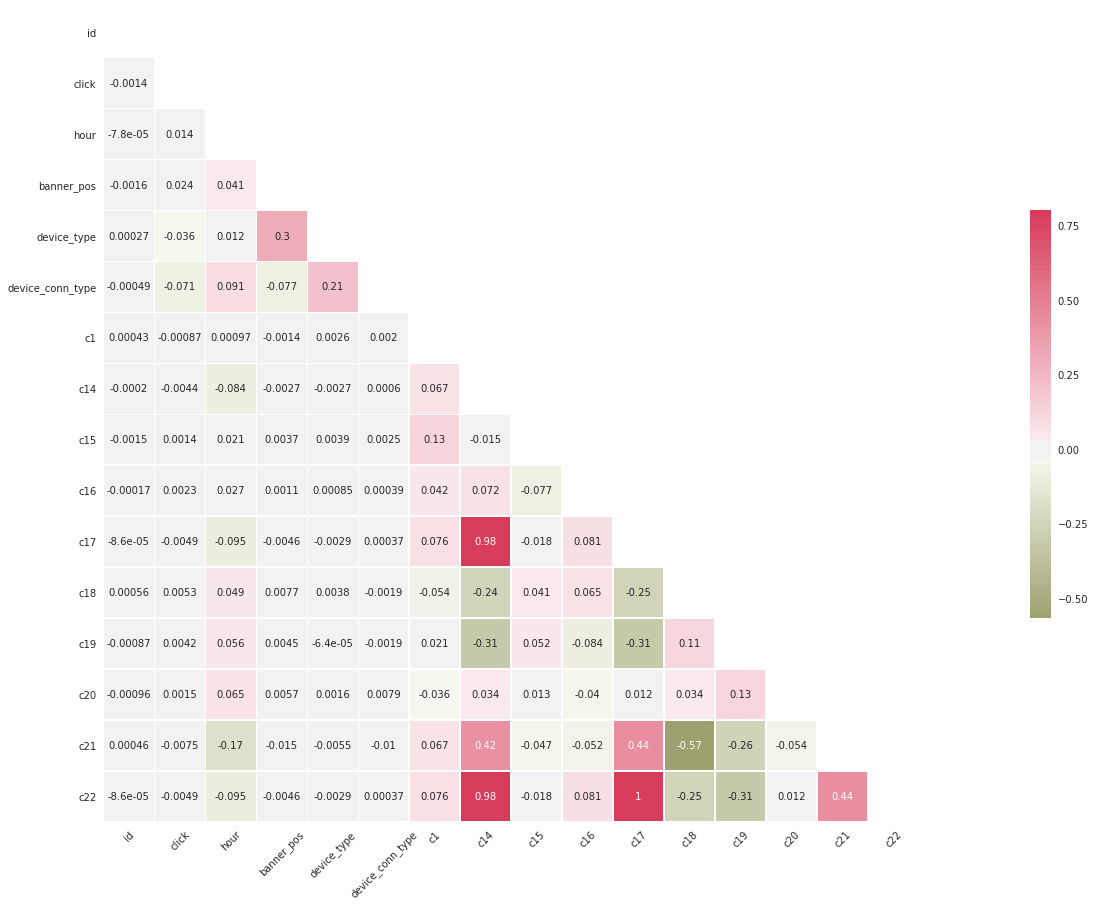

In [137]:
f, ax = plt.subplots(figsize=(40, 15))
cmap = sns.diverging_palette(90, 5, as_cmap=True)
sns.heatmap(dados_correlacao, mask=mascara, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

Caso você tenha dezenas/centenas/etc de atributos, talvez prefira salvar o *heatmap* em uma imagem para melhor visualizá-lo.

In [138]:
#plt.savefig('correlacao.jpg')

## > O que acontece com os atributos "c17" e "c22"? 

<br>
<br>
<br>

In [140]:
dados.iloc[:10]

,id,click,hour,banner_pos,site_id,site_domain,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,c1,c14,c15,c16,c17,c18,c19,c20,c21,date_converted,hour_only
11,1003130369740000000.00,0,14102100.00,0,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,06181484,7ac6007f,1,2,1005,15701,320,50,1722,0,35,-1,79,2014-10-21,00
18,10032264153099999232.00,0,14102100.00,0,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,27cab2a3,0,1,0,1005,6558,320,50,571,2,39,-1,32,2014-10-21,00
23,10033341691900000256.00,0,14102100.00,0,0,0,ecad2386,7801e8d9,07d7df22,a99f214a,3ccb191e,1f0bc64f,1,0,1005,15701,320,50,1722,0,35,-1,79,2014-10-21,00
32,10033908124199999488.00,0,14102100.00,0,85f751fd,c4e18dd6,0acbeaa3,45a51db4,f95efa07,0,42f455c7,0,1,0,1005,15708,320,50,1722,0,35,100083,79,2014-10-21,00
51,10037004173799999488.00,0,14102100.00,0,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,5238bd78,1f0bc64f,1,0,1005,15705,320,50,1722,0,35,100084,79,2014-10-21,00
66,10039246519499999232.00,0,14102100.00,0,85f751fd,0,51cedd4e,aefc06bd,0f2161f8,a99f214a,84fb8c78,542422a7,1,0,1005,17747,320,50,1974,2,39,100021,33,2014-10-21,00
88,10042761370699999232.00,1,14102100.00,0,89a490f5,ce307e01,ecad2386,7801e8d9,07d7df22,0,664cd55b,be87996b,1,2,1005,15704,320,50,1722,0,35,-1,79,2014-10-21,00
90,10043301534200000512.00,1,14102100.00,0,0,c4e18dd6,e2fcccd2,5c5a694b,0f2161f8,a99f214a,90f4d280,57b3c6c3,1,0,1005,15703,320,50,1722,0,35,-1,79,2014-10-21,00
91,10043326267399999488.00,0,14102100.00,0,85f751fd,c4e18dd6,de97da65,33da2e74,0f2161f8,a99f214a,930ec31d,0,1,0,1005,15705,320,50,1722,0,35,100083,79,2014-10-21,00
112,10047611483800000512.00,1,14102100.00,0,1fbe01fe,f3845767,ecad2386,7801e8d9,07d7df22,a99f214a,19b4af68,711ee120,1,0,1005,20352,320,50,2333,0,39,-1,157,2014-10-21,00


## > Realmente precisamos de todos estes atributos?

<br>
<br>
<br>

-----
## Exploração de Dados
#  Visualização

## > Qual é a primeira coisa que vem na sua cabeça para visualizar quando se trata de um *dataset* temporal?

<br>
<br>
<br>

In [152]:
dados.groupby('date_converted').count()

,id,click,banner_pos,site_id,site_domain,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,c1,c14,c15,c16,c17,c18,c19,c20,c21,hour_only
date_converted,,,,,,,,,,,,,,,,,,,,,,,
2014-10-21,301267,301267,301267,301267,301267,301267,301267,301267,301267,301267,301267,301267,301267,301267,301267,301267,301267,301267,301267,301267,301267,301267,301267
2014-10-22,389931,389931,389931,389931,389931,389931,389931,389931,389931,389931,389931,389931,389931,389931,389931,389931,389931,389931,389931,389931,389931,389931,389931
2014-10-23,282781,282781,282781,282781,282781,282781,282781,282781,282781,282781,282781,282781,282781,282781,282781,282781,282781,282781,282781,282781,282781,282781,282781
2014-10-24,243028,243028,243028,243028,243028,243028,243028,243028,243028,243028,243028,243028,243028,243028,243028,243028,243028,243028,243028,243028,243028,243028,243028
2014-10-25,245587,245587,245587,245587,245587,245587,245587,245587,245587,245587,245587,245587,245587,245587,245587,245587,245587,245587,245587,245587,245587,245587,245587
2014-10-26,13454,13454,13454,13454,13454,13454,13454,13454,13454,13454,13454,13454,13454,13454,13454,13454,13454,13454,13454,13454,13454,13454,13454


Ok, massa! E como **visualizamos** essa informação?

#### 1. Podemos usar o matplotlib padrão

Nosso *dataset* começa no dia **22/10/2014** e termina no dia **26/10/2014**.

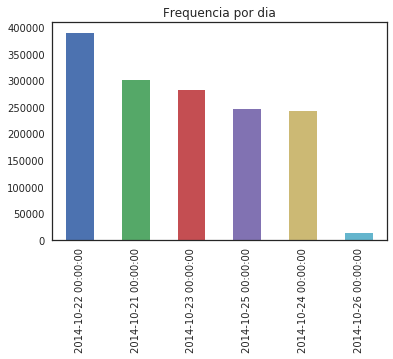

#### 2. Ou podemos usar uma biblioteca chamada [*seaborn*](https://seaborn.pydata.org/examples/)

Ela tem uma apresentação mais "bonitinha", além de ter mais opções de *plots* e mais fácil utilização (**IMHO**).

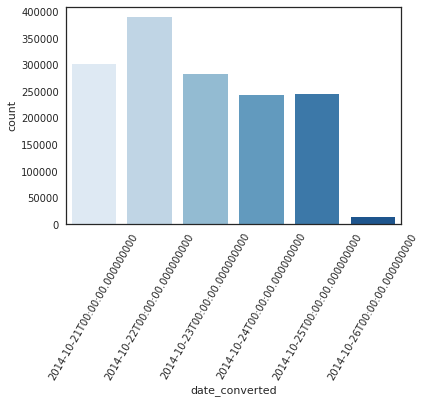

Existem outras formas de visualizar contagens, vamos testar os atributos **"click", "banner_pos" e "device_type"**.

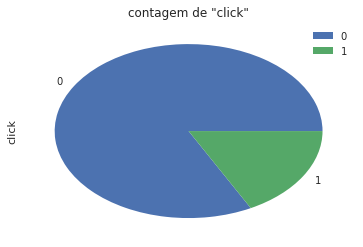

In [143]:
dados_count = pd.DataFrame(pd.Series.value_counts(dados['click']))
dados_count.plot(y='click', kind='pie', title='contagem de "click"')
plt.show()

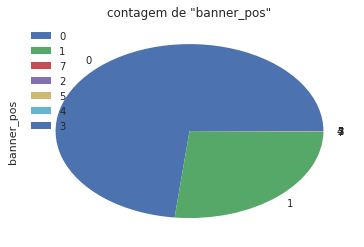

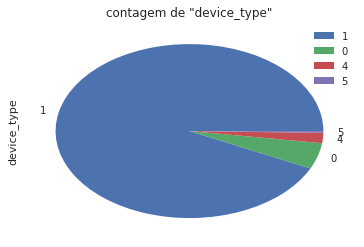

Ainda no atributo "device_type", utilizar o *seaborn* pode ser uma alternativa legal.

*(ele **não** possui opções para gráficos de pizza!)*

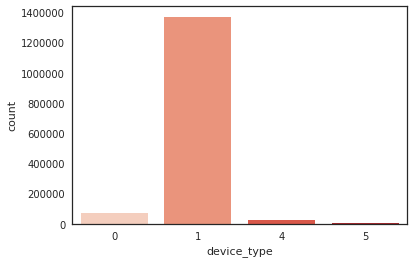

In [191]:
sns.countplot(x='device_type', data=dados, palette='Reds')
plt.show()

#### Vamos plotar a frequencia de cliques por hora (ainda bem que mantivemos a hora salva, hein?)

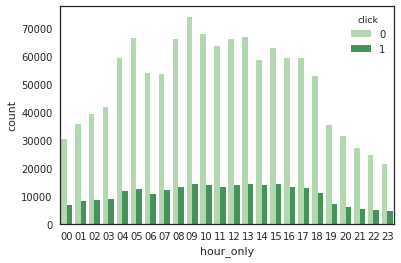

---

## Histogramas

Esta é uma ferramenta já bem conhecida: ***[histogram](https://statistics.laerd.com/statistical-guides/understanding-histograms.php)***, a mais tradicional forma de plotar a distribuição de frequências e identificar *outliers*.

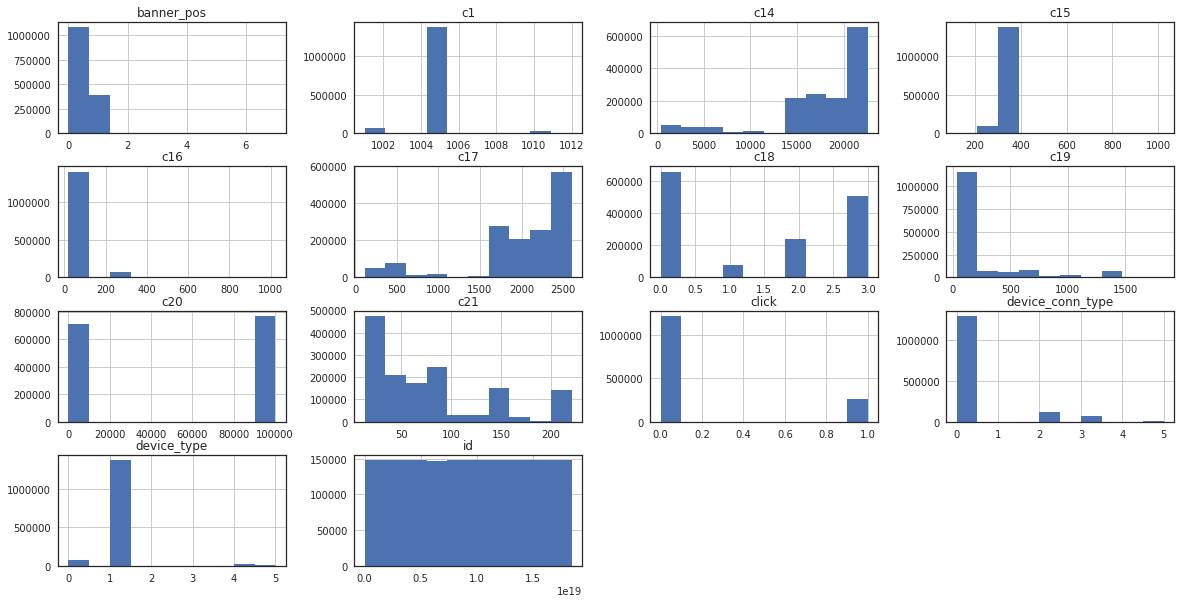

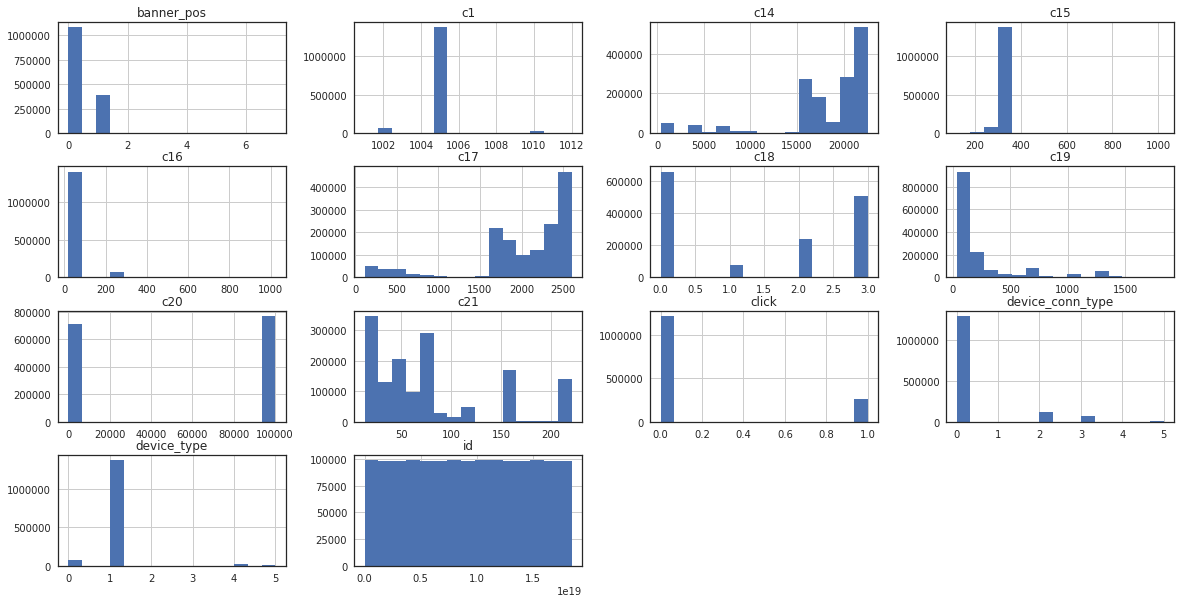

---
## Boxplots

Uma ferramenta extremamente útil para entender o comportamento dos seus dados é o [*boxplot*](https://en.wikipedia.org/wiki/Box_plot).

#### Mas o que significa esse gráfico? 

### Simplificando...

<img style="float: center; width: 500px;" src='img/boxplot.jpg' alt="boxplot">

Você pode rodar em todo o seu *dataframe*:

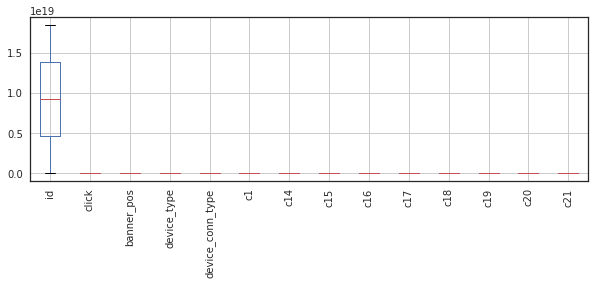

Ou em apenas um atributo específico:

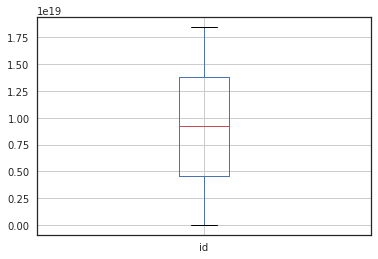

In [223]:
dados.boxplot(column='id')
plt.show()

Com o *seaborn*, é feito da seguinte maneira:

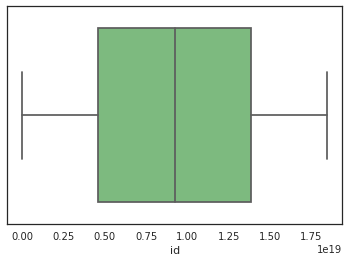

Vamos executar em todas as nossas variáveis categóricas isoladamente?

----
## Subplots e pivot_table

Não é necessário executar **um por um**, você pode construir *[**subplots**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html)*!

Outra coisa importante para nunca esquecer: **[PIVOT TABLES!](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) <3**

Exatamente o mesmo conceito que você já está acostumado no Excel.

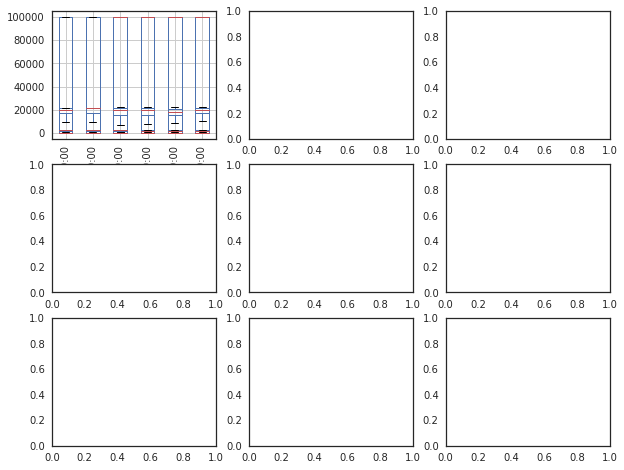

In [100]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,8))

c14_pivot = dados.pivot(columns='date_converted', values='c14')
c14_pivot.boxplot(rot=90, showfliers=False, ax=axes[0,0])

c15_pivot = dados.pivot(columns='date_converted', values='c15')
c15_pivot.boxplot(rot=90, showfliers=False, ax=axes[0,0])

c16_pivot = dados.pivot(columns='date_converted', values='c16')
c16_pivot.boxplot(rot=90, showfliers=False, ax=axes[0,0])

c17_pivot = dados.pivot(columns='date_converted', values='c17')
c17_pivot.boxplot(rot=90, showfliers=False, ax=axes[0,0])

c18_pivot = dados.pivot(columns='date_converted', values='c18')
c18_pivot.boxplot(rot=90, showfliers=False, ax=axes[0,0])

c19_pivot = dados.pivot(columns='date_converted', values='c19')
c19_pivot.boxplot(rot=90, showfliers=False, ax=axes[0,0])

#TO-DO 'c20'
#TO-DO 'c21'

plt.show()

Parece que apenas o atributo **"c14"** não é categórico e possui alguma distribuição de valores.

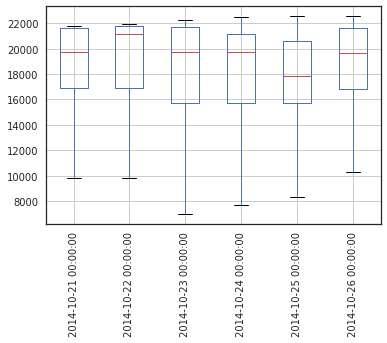

---
## Violinplot

Outra forma muito bacana de explorar o comportamento de seus dados é com o ***[violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)***, uma combinação de *boxplot* com densidades.

Vamos observar o comportamento de todas as variáveis categóricas!

*(seaborn+subplots+violinplots)*

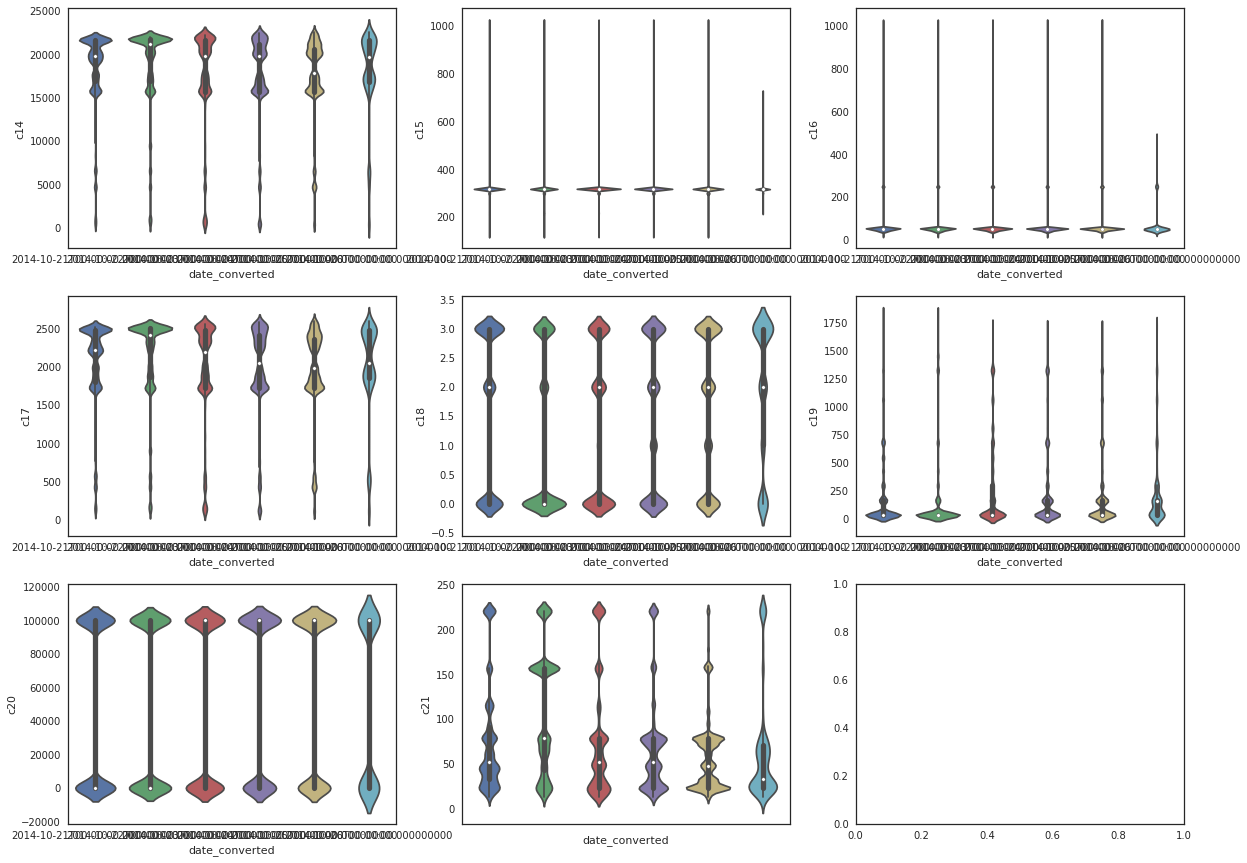

In [209]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=[20,15])

sns_plot = sns.violinplot(x='date_converted', y='c14', data=dados, ax=axes[0,0])
sns_plot = sns.violinplot(x='date_converted', y='c15', data=dados, ax=axes[0,1])
sns_plot = sns.violinplot(x='date_converted', y='c16', data=dados, ax=axes[0,2])
sns_plot = sns.violinplot(x='date_converted', y='c17', data=dados, ax=axes[1,0])
sns_plot = sns.violinplot(x='date_converted', y='c18', data=dados, ax=axes[1,1])
sns_plot = sns.violinplot(x='date_converted', y='c19', data=dados, ax=axes[1,2])

#TO-DO 'c20'
#TO-DO 'c21'

plt.show()

---
# Fim.

<img style="float: left; width: 400px;" src='img/end.jpg' alt="end">

-----
## O que fazer agora?

Segue uma lista de **desafios** como próximos passos:

1. **Próxima aula** (detalhes abaixo)
2. Rodar algoritmos de ***clustering*** para extrair novos *insights*?
3. **Agregar** novos dados **públicos**?
4. **Engenharia de atributos**?
5. Modelar **perfis** de anúncios?
6. **Prever** CTR?
7. **Adicionar perfis** como *feature* de um **modelo de predição** de CTR?
8. Rodar algoritmos (*e.g.,* LOF-LocalOutlierFactor) para **detectar anomalias**?
9. Prever **CPC** e ** *bounce rate***?

---
# Próxima aula!

Vamos repetir a mesma abordagem de hoje:
1. Coleta e leitura de dados
2. Q&A
3. Correlações
4. Visualização

**Tragam seu próprio *dataset*. **Pode ser algo de sua empresa ou cliente (verifique questões de segurança da informação antes, ok?)

Lembram de nossa primeira aula? Passei alguns *links* importantes para busca de *datasets* públicos:
- [*datasets* públicos disponibilizados pela AWS](https://aws.amazon.com/public-datasets/)
- [*datasets* armazenados publicamente na AWS](https://registry.opendata.aws/)
- [Kaggle](https://www.kaggle.com/datasets)
- [Github](https://github.com/awesomedata/awesome-public-datasets)
- [*datasets* públicos disponibilizados pelo Google](https://cloud.google.com/bigquery/public-data/)
- [UCI](http://archive.ics.uci.edu/ml/index.php)

<img style="float: left; width: 300px;" src='img/obg.jpg' alt="OBG">

-----